# 테스트를 위한 주피터 노트북

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from data import generate_linear_sem, generate_linear_sem_correlated, generate_random_dag

True


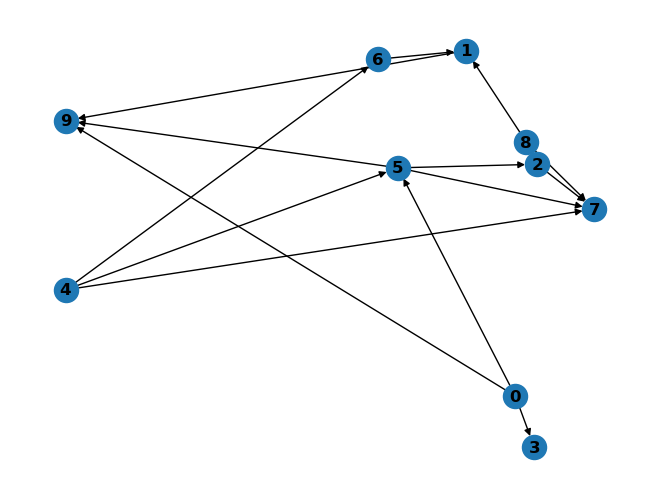

In [2]:
# Generate random DAG and plot

G = generate_random_dag(d=10, degree=3, seed=1 )

print(nx.is_directed_acyclic_graph(G))

nx.draw(G, with_labels=True, font_weight='bold')

In [3]:
# Generate linear SEM data

generate_linear_sem(graph=G, n=1000, dist='laplace', loc=0.0, scale=1.0, seed=1)

array([[ -0.18146911,  -1.64613813,  -9.48907156, ..., -12.96542203,
         -0.2312577 ,   2.54343334],
       [ -0.17627305,  -4.07870725,   2.28401629, ...,   8.39308988,
         -1.27020564,   8.18385701],
       [  0.92002052,   2.48161904,  -0.45407732, ...,  -6.76537572,
         -1.07980769,  -3.57458729],
       ...,
       [ -0.32329463,  -0.96926553,  -2.25949272, ...,  -8.8377537 ,
         -2.26622088,   2.41013651],
       [ -0.0288545 ,   0.16565031,  -1.98450186, ...,   0.57496231,
          2.02817937,   0.34138131],
       [  0.19018876,  -1.42706   ,   6.31649696, ...,   6.66916271,
         -1.53207273,   3.90146235]])

In [60]:
idxs = np.random.choice(np.arange(len(G.edges)), size=5, replace=False)

In [61]:
idxs

array([ 3,  8, 10, 11,  1])

In [63]:
G.edges()[idxs]

ValueError: too many values to unpack (expected 2)

In [69]:
np.array(G.edges())

array([[0, 3],
       [0, 5],
       [0, 9],
       [1, 9],
       [2, 7],
       [4, 5],
       [4, 6],
       [4, 7],
       [5, 2],
       [5, 7],
       [5, 9],
       [6, 1],
       [8, 1],
       [8, 7]])

In [8]:
list(nx.topological_sort(G))

[0, 4, 8, 3, 5, 6, 2, 1, 7, 9]

In [70]:
idxs

array([ 3,  8, 10, 11,  1])

In [72]:
selected_edges = np.array(G.edges())[idxs]
selected_edges

array([[1, 9],
       [5, 2],
       [5, 9],
       [6, 1],
       [0, 5]])

In [81]:
import numpy as np

def permute_array(arr, order_dict):
    # Convert the dictionary to a list of keys, sorted by their values
    new_order = sorted(order_dict, key=order_dict.get)
    # Use advanced indexing to rearrange the rows and columns
    return arr[np.ix_(new_order, new_order)]

# example usage
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
order_dict = {0: 2, 1: 0, 2: 1}

print(permute_array(arr, order_dict))

[[5 6 4]
 [8 9 7]
 [2 3 1]]


In [4]:
# Generate linear SEM data with correlated noise

generate_linear_sem_correlated(graph=G, n=1000, prop=0.5, seed=1)

array([[ 1.3814073 , -1.0038117 , -0.48775032, ..., -6.09612396,
        -0.74362701,  1.04942581],
       [-1.03890593,  0.98569044,  3.80667793, ...,  6.3752206 ,
        -0.05682428, -1.50486008],
       [ 0.04752605,  1.01716301,  1.35272714, ..., -1.40355535,
        -0.85746521,  1.7224814 ],
       ...,
       [ 1.70966083,  2.70000962, -2.49899363, ..., -7.33656728,
        -0.64869199, -9.03398232],
       [-1.98576608, -1.11411256, -0.16818537, ...,  0.97588504,
         0.28668966,  3.77894881],
       [-0.1634099 ,  2.02140257, -3.06539658, ..., -9.10231716,
         1.58793764, -6.95143475]])